In [5]:
import numpy as np
import math
import scipy as sp
import scipy.stats

class NaiveBayesClassifier:

    # Number of class of the dataset
    nb_class = 0

    # Number of features of the dataset
    nb_dim = 0

    def __init__(self, nb_class, nb_dim):
        self.nb_class = nb_class
        self.nb_dim = nb_dim

        self.mu = np.zeros((nb_class, nb_dim))
        self.sigma = np.zeros((nb_class, nb_dim, nb_dim))
        self.prior = np.zeros(nb_class)

    def train(self, data, label):
        # Compute mu and sigma for each dimension
        for c in range(self.nb_class):
            for d in range(self.nb_dim):
                new_list = []
                count = 0
                for l in range(len(label)):
                    if label[l] == c:
                        self.mu[c][d] += data[l][d]
                        count += 1
                        new_list.append(data[l][d])
                self.mu[c][d] /= count
                self.sigma[c][d][d] = 1 #np.var(np.array(new_list))

            for l in range(len(label)):
                if label[l] == c:
                    self.prior[c] += 1
            self.prior[c] /= len(label)

            print("Done class {}".format(c))
            #print(self.sigma[c])

    def predict(self, sample):
        prob = np.zeros(self.nb_class)

        for c in range(self.nb_class):
            # Compute score for each class and put in the prob list
            #tmp = math.exp(-(1.0 / 2.0) * np.matmul(np.matmul((sample - self.mu[c]).transpose(), np.linalg.inv(self.sigma[c])), sample - self.mu[c])) * 1.0 / (math.pow((2.0 * math.pi), (self.nb_dim / 2.0)) * math.pow(np.linalg.norm(self.sigma[c]), (1.0 / 2.0)))
            tmp = sp.stats.multivariate_normal(self.mu[c], self.sigma[c], allow_singular=True)
            prob[c] = tmp.pdf(sample) * self.prior[c]

            print("Done predict class {}".format(c))

        return np.argmax(prob)

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalization
#x_train = x_train / 255.0
#x_test = x_test / 255.0

# Flatten
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

# Reduce size of dataset
x_train = np.resize(x_train, (600, 28*28))
y_train = np.resize(y_train, (600,))

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(600, 784) (600,)
(10000, 784) (10000,)


In [3]:
nb_class = 10
nb_dim = 28*28
classifier = NaiveBayesClassifier(nb_class, nb_dim)

classifier.train(x_train, y_train)

Done class 0
Done class 1
Done class 2
Done class 3
Done class 4
Done class 5
Done class 6
Done class 7
Done class 8
Done class 9


Done predict class 0
Done predict class 1
Done predict class 2
Done predict class 3
Done predict class 4
Done predict class 5
Done predict class 6
Done predict class 7
Done predict class 8
Done predict class 9
0


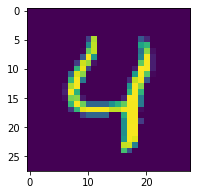

In [9]:
res = classifier.predict(x_test[4])
print(res)

x_test = x_test.reshape((10000, 28, 28))
plt.figure(figsize = (3, 3))
plt.imshow(x_test[4], interpolation='nearest')